In [1]:
from utils import summary_df, syntax_error_or_missing_count, primary_error_count, avgs_results, plot_syntax_error_or_missing_count, print_times, get_avg_input_tokens
import pandas as pd

step = 3

# sas_df = summary_df('sas', step) 
# sas_df.to_csv(f'../sas_files/translations_{step}/sas_df.tsv', sep='\t')

# sql_df = summary_df('sql', step)
# sql_df.to_csv(f'../sql_files/translations_{step}/sql_df.tsv', sep='\t')

# sas_etl_df = summary_df('sas_etl', step)
# sas_etl_df.to_csv(f'../sql_files/translations_{step}/sql_df.tsv', sep='\t')

sas_df = pd.read_csv(f'../sas_files/translations_{step}/sas_df.tsv', sep='\t')   
sql_df = pd.read_csv(f'../sql_files/translations_{step}/sql_df.tsv', sep='\t')
# sas_etl_df = pd.read_csv(f'../sql_files/translations_{step}/sas_etl_df.tsv', sep='\t')

In [2]:
df = sas_df

In [3]:
df[(df['maintainability_index'].isna()) & (df['syntax_error'].isna())][['model', 'file', 'version']]

,model,file,version
4,CodeQwen1.5-7B-Chat,file_5,v1
5,CodeQwen1.5-7B-Chat,file_6,v1
13,CodeQwen1.5-7B-Chat,file_7,v2
14,Magicoder-S-DS-6.7B,file_1,v1
20,Magicoder-S-DS-6.7B,file_7,v1
30,OpenCodeInterpreter-DS-6.7B,file_3,v1
34,OpenCodeInterpreter-DS-6.7B,file_7,v1
41,OpenCodeInterpreter-DS-6.7B,file_7,v2
45,Artigenz-Coder-DS-6.7B,file_4,v1
59,deepseek-coder-33b-instruct,file_4,v1


In [4]:
df[df['loop'] == True][['model', 'file', 'version']]

,model,file,version
4,CodeQwen1.5-7B-Chat,file_5,v1
5,CodeQwen1.5-7B-Chat,file_6,v1
13,CodeQwen1.5-7B-Chat,file_7,v2
41,OpenCodeInterpreter-DS-6.7B,file_7,v2


In [5]:
df[df['partial_code'] == True][['model', 'file', 'version']]

,model,file,version


In [6]:
syntax_error_or_missing_count(df, with_version=True)

,model,version,code_w_syntax_errors,code_not_available,code_in_loop,partial_code
0,CodeQwen1.5-7B-Chat,v1,2,0,0,1
1,CodeQwen1.5-7B-Chat,v2,0,1,0,1
2,OpenCodeInterpreter-DS-6.7B,v1,0,2,0,0
3,OpenCodeInterpreter-DS-6.7B,v2,1,0,0,0
4,Artigenz-Coder-DS-6.7B,v1,2,1,0,2
5,Artigenz-Coder-DS-6.7B,v2,1,1,0,3
6,Magicoder-S-DS-6.7B,v1,2,0,0,2
7,Magicoder-S-DS-6.7B,v2,0,0,0,3
8,deepseek-coder-33b-instruct,v1,0,3,0,2
9,deepseek-coder-33b-instruct,v2,0,0,0,4


In [7]:
syntax_error_or_missing_count(df, with_version=False)

,model,code_w_syntax_errors,code_not_available,code_in_loop,partial_code
0,CodeQwen1.5-7B-Chat,2,1,0,2
1,OpenCodeInterpreter-DS-6.7B,1,2,0,0
2,Artigenz-Coder-DS-6.7B,3,2,0,5
3,Magicoder-S-DS-6.7B,2,0,0,5
4,deepseek-coder-33b-instruct,0,3,0,6
5,OpenCodeInterpreter-DS-33B,1,6,0,4


In [16]:
primary_error_count(df)

primary_errors_rank                  Good  Mediocre  Poor  Very poor  \
model                       version                                    
Artigenz-Coder-DS-6.7B      v1          3         1     0          0   
                            v2          3         2     0          0   
CodeQwen1.5-7B-Chat         v1          3         1     0          0   
                            v2          5         1     0          0   
Magicoder-S-DS-6.7B         v1          4         1     0          0   
                            v2          6         1     0          0   
OpenCodeInterpreter-DS-33B  v1          3         0     0          0   
                            v2          4         0     0          0   
OpenCodeInterpreter-DS-6.7B v1          5         0     0          0   
                            v2          5         1     0          0   
deepseek-coder-33b-instruct v1          4         0     0          0   
                            v2          7         0     0          0   

primary_errors_rank                  Extremely poor  NaN  Total  
model                       version                              
Artigenz-Coder-DS-6.7B      v1                    0    3      7  
                            v2                    0    2      7  
CodeQwen1.5-7B-Chat         v1                    1    2      7  
                            v2                    0    1      7  
Magicoder-S-DS-6.7B         v1                    0    2      7  
                            v2                    0    0      7  
OpenCodeInterpreter-DS-33B  v1                    0    4      7  
                            v2                    0    3      7  
OpenCodeInterpreter-DS-6.7B v1                    0    2      7  
                            v2                    0    1      7  
deepseek-coder-33b-instruct v1                    0    3      7  
                            v2                    0    0      7

In [6]:
avgs_results(df)

time  commented_lines  \
model                       version                               
Artigenz-Coder-DS-6.7B      v1       49.066667         7.280000   
                            v2       63.340000        14.150000   
CodeQwen1.5-7B-Chat         v1       56.143333         7.725000   
                            v2       60.105000         7.960000   
Magicoder-S-DS-6.7B         v1       52.755000         5.050000   
                            v2       53.443333         8.700000   
OpenCodeInterpreter-DS-33B  v1       58.700000         4.400000   
                            v2       52.108333        18.460000   
OpenCodeInterpreter-DS-6.7B v1       53.721667         5.660000   
                            v2       35.605000        14.000000   
deepseek-coder-33b-instruct v1       50.786667        10.720000   
                            v2       56.806667         8.533333   

                                     halstead_volume  secondary_errors_index  \
model                       version                                            
Artigenz-Coder-DS-6.7B      v1               233.160                0.020000   
                            v2                90.550                0.076667   
CodeQwen1.5-7B-Chat         v1               104.000                0.020000   
                            v2               168.700                0.038000   
Magicoder-S-DS-6.7B         v1               203.050                0.010000   
                            v2               215.380                0.050000   
OpenCodeInterpreter-DS-33B  v1                83.575                0.010000   
                            v2                89.060                0.056000   
OpenCodeInterpreter-DS-6.7B v1                26.200                0.024000   
                            v2                37.100                0.034000   
deepseek-coder-33b-instruct v1               170.660                0.074000   
                            v2               123.150                0.048333   

                                     cyclomatic_complexity_index  
model                       version                               
Artigenz-Coder-DS-6.7B      v1                          8.620000  
                            v2                         13.833333  
CodeQwen1.5-7B-Chat         v1                          9.550000  
                            v2                         11.800000  
Magicoder-S-DS-6.7B         v1                         12.575000  
                            v2                         10.840000  
OpenCodeInterpreter-DS-33B  v1                         18.775000  
                            v2                         11.760000  
OpenCodeInterpreter-DS-6.7B v1                          7.600000  
                            v2                         11.060000  
deepseek-coder-33b-instruct v1                         18.060000  
                            v2                         12.400000

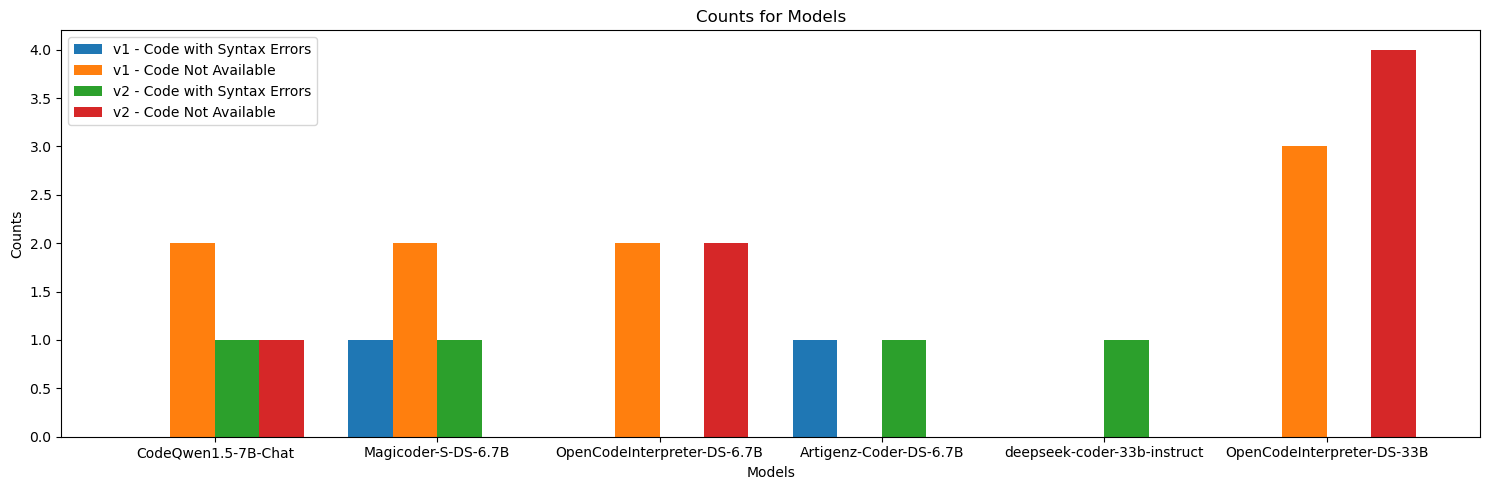

In [6]:
plot_syntax_error_or_missing_count(df)


### Prompt visualization

In [29]:
language = 'sql'
version = 2
step = 2

path = f'../prompts/prompts_{step}/prompt_{language}_v{version}.txt'

with open(path, 'r') as file:
    code = file.read()

# code = code.replace(';', ';\n')
code = code.replace(';\n', ';')

with open(path, 'w') as file:
    file.write(code)

### dowload model structure

In [6]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("Qwen/CodeQwen1.5-7B-Chat")
model = AutoModelForCausalLM.from_pretrained("Qwen/CodeQwen1.5-7B-Chat")

Loading checkpoint shards: 100%|██████████| 4/4 [00:22<00:00,  5.59s/it]


In [8]:
from transformers import TRANSFORMERS_CACHE
import shutil
shutil.rmtree(TRANSFORMERS_CACHE)

In [7]:
model

Qwen2ForCausalLM(
  (model): Qwen2Model(
    (embed_tokens): Embedding(92416, 4096)
    (layers): ModuleList(
      (0-31): 32 x Qwen2DecoderLayer(
        (self_attn): Qwen2SdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=True)
          (k_proj): Linear(in_features=4096, out_features=512, bias=True)
          (v_proj): Linear(in_features=4096, out_features=512, bias=True)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): Qwen2RotaryEmbedding()
        )
        (mlp): Qwen2MLP(
          (gate_proj): Linear(in_features=4096, out_features=13440, bias=False)
          (up_proj): Linear(in_features=4096, out_features=13440, bias=False)
          (down_proj): Linear(in_features=13440, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): Qwen2RMSNorm()
        (post_attention_layernorm): Qwen2RMSNorm()
      )
    )
    (norm): Qwen2RMSNorm()
  )
  (lm_head): Line

### tables visualization

In [8]:
path = r'C:\Users\mcandi\OneDrive - KPMG\Desktop\VM_code\sas_files\translations_2\summary_sas.json'
path = r'C:\Users\mcandi\OneDrive - KPMG\Desktop\VM_code\sas_files\translations_3\summary_sas.json'
path = r'C:\Users\mcandi\OneDrive - KPMG\Desktop\VM_code\sql_files\translations_3\summary_sql.json'
df_v1, df_v2 = print_times(path)

In [9]:
v1_dict, v2_dict = get_avg_input_tokens(path, 'sql')

In [10]:
df_v1

,file_1,file_2,file_3,file_4,file_5,file_6
CodeQwen1.5-7B-Chat,50.12,65.40,92.70,155.72,181.62,168.51
OpenCodeInterpreter-DS-6.7B,59.12,69.49,58.78,116.65,131.41,84.36
Artigenz-Coder-DS-6.7B,81.18,84.12,162.90,114.30,238.63,215.22
Magicoder-S-DS-6.7B,52.93,51.77,78.40,142.26,118.92,193.75
deepseek-coder-33b-instruct,33.29,35.90,43.45,73.90,58.17,61.53
OpenCodeInterpreter-DS-33B,27.61,39.07,24.49,11.61,100.13,42.86


In [11]:
df_v2

,file_1,file_2,file_3,file_4,file_5,file_6
CodeQwen1.5-7B-Chat,48.04,65.21,103.43,263.59,260.90,210.41
OpenCodeInterpreter-DS-6.7B,66.54,51.36,87.37,155.23,78.01,537.61
Artigenz-Coder-DS-6.7B,92.29,131.30,106.90,271.76,235.16,207.81
Magicoder-S-DS-6.7B,52.99,81.40,79.72,25.56,184.94,219.83
deepseek-coder-33b-instruct,40.12,28.89,50.55,69.77,60.81,39.31
OpenCodeInterpreter-DS-33B,27.67,27.57,59.04,17.88,100.54,22.78
